<a href="https://colab.research.google.com/github/TheGodseeker/ML_PR/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [ ]:
!pip install datasets seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install xlrd

In [ ]:
#data = load_dataset("/content/data.xlxs")
df = pd.read_excel("/content/data.xlsx")
#df = pd.read_csv("/content/kc_house_data.csv")
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

y = house price of unit area(цена лота)

In [ ]:
#убираем ненужные столбцы

df = df.drop(['X1 transaction date', 'X5 latitude', 'X6 longitude'], axis=1)
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

<Axes: >

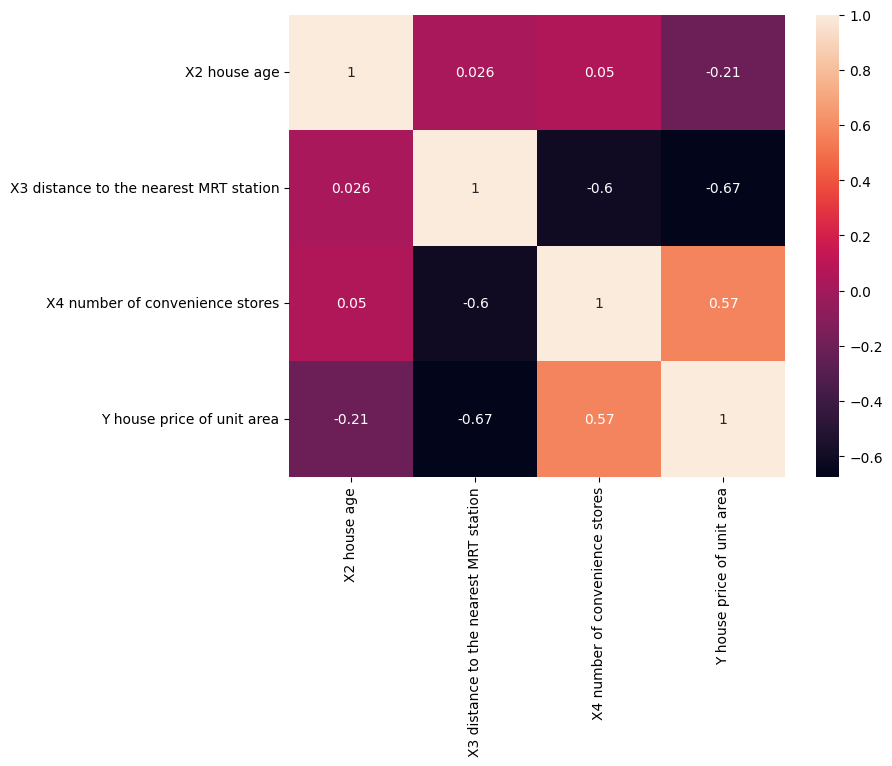

In [ ]:
#определяем корреляцию

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

На цену участка больше всего влияет кол-во гипермаркетов (X4 number of convenience stores). Меньшее влияние оказывает возраст дома (X2 house age) и расстояние до остановки (X3 distance to the nearest MRT station).

Для последующего исследования была выбрана переменная "X4 number of convenience stores", т.к. она сильнее всего может помочь проследить/предсказать будущую цену.

In [ ]:
# чистим пропуски
for x in df["X4 number of convenience stores"]:
  print(x)
#пропусков нет

10
9
5
5
5
3
7
6
1
3
1
9
5
4
4
2
6
1
8
7
3
7
1
7
4
2
5
5
4
5
0
7
1
6
7
0
2
1
6
5
0
0
5
6
4
8
9
3
0
1
4
1
3
5
5
0
8
7
1
5
2
6
3
4
0
8
6
5
6
5
9
3
8
0
10
1
3
3
2
1
4
6
7
3
7
9
1
0
0
0
1
0
4
0
5
5
9
3
5
9
4
1
6
6
6
6
8
1
2
3
5
7
3
6
8
2
1
0
3
5
5
5
4
0
7
6
4
5
6
7
8
3
5
8
6
0
5
6
0
5
5
3
5
5
1
5
0
8
0
8
7
9
1
6
0
0
0
4
5
4
8
3
0
5
0
1
6
8
5
1
0
5
9
4
7
3
0
9
4
1
0
8
3
0
0
3
3
0
8
0
8
2
7
5
0
5
2
8
7
8
0
5
3
5
1
3
10
3
1
8
5
1
2
9
3
8
1
6
5
8
9
0
10
0
6
6
0
8
0
0
3
0
1
9
4
7
10
0
0
0
2
7
3
8
3
5
6
0
0
1
7
0
9
2
5
1
1
1
6
0
4
3
5
3
7
4
3
5
5
0
1
8
5
1
7
7
5
3
6
3
6
9
1
2
7
3
9
5
6
5
0
7
5
7
6
3
4
4
0
10
4
0
3
0
3
5
1
0
5
0
2
4
9
5
6
2
7
2
10
5
0
4
1
6
2
8
7
3
3
0
0
0
2
5
5
6
2
5
9
5
0
2
9
8
0
0
2
1
6
5
5
3
3
3
1
5
1
9
6
0
10
8
4
10
7
4
1
2
1
3
5
5
7
1
5
0
2
8
8
6
5
9
0
4
0
10
0
3
4
8
9
1
6
4
1
4
1
4
2
1
5
3
1
9
5
6
7
0
3
0
9
7
5
9


Далее идет проверка на выбросы "X4 number of convenience stores". 'Y house price of unit area' проверяться не будет, т.к. вполне возможны высокие цены на недвижимость.

<Axes: ylabel='X4 number of convenience stores'>

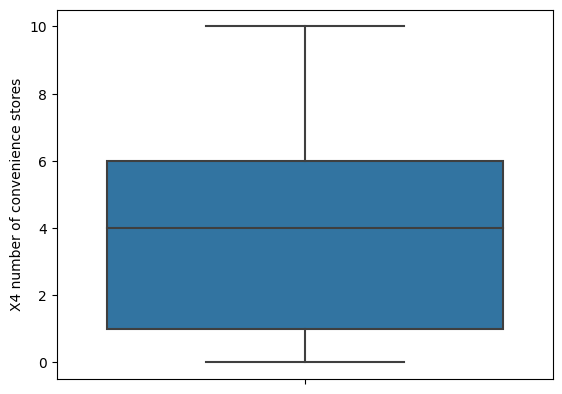

In [ ]:
#проверяем на выбросы "X4 number of convenience stores"

sns.boxplot(data = df, y = "X4 number of convenience stores")

<Axes: ylabel='X4 number of convenience stores'>

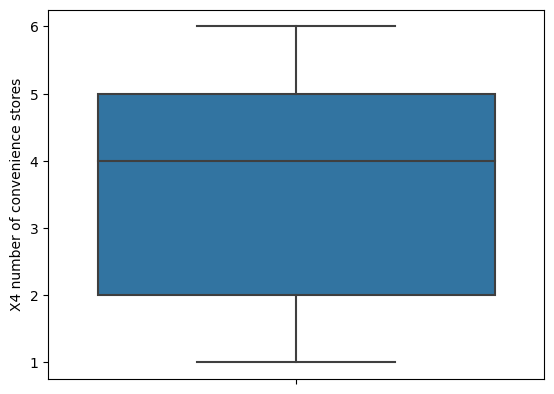

In [ ]:
#убираем все что не вписывается в 1 и 4 квартили

q = df["X4 number of convenience stores"].quantile([0.25,0.5,0.75])

for index, value in df["X4 number of convenience stores"].items():
  if value < q[0.25] or value > q[0.75]: df = df.drop(index)

sns.boxplot(data = df, y = "X4 number of convenience stores")

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [ ]:
#копируем необходимые столбцы в отдельный df
num_features = df.select_dtypes(include=['float64', 'int64']).columns

df_work = df[['Y house price of unit area', "X4 number of convenience stores"]]
ss = StandardScaler()
df_work[num_features] = ss.fit_transform(df[num_features])

df_work
#трансформация

<ipython-input-25-a2cd6dbfe557>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work[num_features] = ss.fit_transform(df[num_features])


,Y house price of unit area,X4 number of convenience stores,X2 house age,X3 distance to the nearest MRT station
2,0.740098,0.794619,-0.298245,-0.431094
3,1.320782,0.794619,-0.298245,-0.431094
4,0.414915,0.794619,-1.069800,-0.588173
5,-0.436755,-0.371751,-0.874587,1.047042
7,0.693644,1.377804,0.352464,-0.682528
...,...,...,...,...
402,-0.715483,-1.538121,-0.354020,-0.774274
404,0.267809,0.794619,-0.010074,-0.680949
405,-0.041889,1.377804,0.603452,-0.826037
408,-0.746453,-0.371751,0.185139,1.047696


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной
X = df_work
y = df_work['Y house price of unit area']


### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)
  return model

def compute_knn(X, y, m, n):
  model = KNeighborsRegressor(metric=m, n_neighbors=n)
  model.fit(X, y)
  return model

def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }


## Регрессия

In [ ]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 5.756788275246283e-16,
 'MSE': 6.495168278036335e-31,
 'R2': 1.0,
 'mape (reverted - % верно угаданых)': 99.99999999999984,
 'mape (original - % ошибок)': 1.5563943399267661e-13}

In [ ]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 4.976275383047194e-16,
 'MSE': 4.637972095449854e-31,
 'R2': 1.0,
 'mape (reverted - % верно угаданых)': 99.99999999999987,
 'mape (original - % ошибок)': 1.3191135753895355e-13}

## KNN

In [ ]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']

for m in metrics:   # Прогнозирование на обучающей выборке (проверка на переобучение)
  model = compute_knn(X_train, y_train, m, 5)
  y_pred = model.predict(X_train)
  print(f"{m} \n {compute_metrics(y_train, y_pred)}")

euclidean 
 {'MAE': 0.14015389150134458, 'MSE': 0.08003929673207534, 'R2': 0.9222149448701805, 'mape (reverted - % верно угаданых)': 54.73435830631094, 'mape (original - % ошибок)': 45.26564169368906}
manhattan 
 {'MAE': 0.1592777514067871, 'MSE': 0.14826358248078095, 'R2': 0.8559121405624442, 'mape (reverted - % верно угаданых)': 51.030909471306316, 'mape (original - % ошибок)': 48.969090528693684}
chebyshev 
 {'MAE': 0.15062168850221835, 'MSE': 0.0781016875870043, 'R2': 0.9240979828318197, 'mape (reverted - % верно угаданых)': 50.88204767002671, 'mape (original - % ошибок)': 49.11795232997329}
minkowski 
 {'MAE': 0.14015389150134458, 'MSE': 0.08003929673207534, 'R2': 0.9222149448701805, 'mape (reverted - % верно угаданых)': 54.73435830631094, 'mape (original - % ошибок)': 45.26564169368906}
cosine 
 {'MAE': 0.16601368586740858, 'MSE': 0.1145060417181497, 'R2': 0.8887189276842521, 'mape (reverted - % верно угаданых)': 47.60065049851057, 'mape (original - % ошибок)': 52.39934950148943}

In [ ]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']

for m in metrics:   # Прогнозирование на тестовой выборке
  model = compute_knn(X_train, y_train, m, 5)
  y_pred = model.predict(X_train)
  print(f"{m} \n {compute_metrics(y_test, y_pred)}")

ValueError: ignored

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""